In [1]:
import tensorflow as tf
from tensorflow_probability import distributions as tfd
import tensorflow.keras as keras
from tensorflow.keras import layers as kl
from tensorflow.nn import sigmoid

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
models = model0, model1 = [
    keras.Sequential([kl.Dense(1, activation="sigmoid")]) 
    for i in [1, 2]
]

In [3]:
model0.compile("adam", "binary_crossentropy")
model1.compile("adam", "mse")

In [5]:
def estimate_model(model, N = 100, a_true = -1, b_true = 2, epochs = 1000):
    X_obs = tfd.Normal(0, 10).sample(N)
    Y_obs = sigmoid(a_true * X_obs + b_true)
    
    X_train, Y_train = X_obs[:, None], Y_obs[:, None]

    model.set_weights([[[0]], [0]])
    model.fit(X_train, Y_train, 
               epochs = epochs, batch_size = len(X_train), verbose=0)
    a, b = [v.numpy().squeeze() for v in model.weights]
    
    return np.array([a, b])
    

In [16]:
estimate_model(model0, epochs=100000)

array([-1.0000132,  1.999988 ], dtype=float32)

In [15]:
estimate_model(model1, epochs=100000)

array([-0.99999917,  2.0000007 ], dtype=float32)

In [6]:
estimated_weights = np.array([
    [estimate_model(model) for model in models]
    for i in range(100)
])

In [11]:
df = pd.DataFrame(estimated_weights.reshape([-1, 4]), 
                  columns = ["a0", "b0", "a1", "b1"])

In [12]:
df.head()

,a0,b0,a1,b1
0,-0.427410,0.744250,-0.270043,0.455088
1,-0.500880,0.735310,-0.368708,0.724479
2,-0.518822,0.863974,-0.415417,0.677331
3,-0.544021,0.851912,-0.416534,0.607768
4,-0.554827,0.943702,-0.458586,0.891336


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001487081B978>,
      dtype=object)

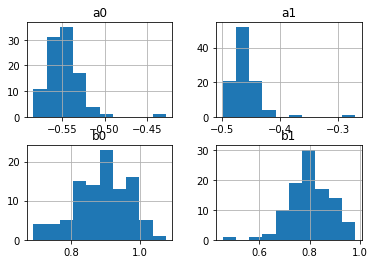

In [13]:
df.hist()

In [14]:
df.describe()

,a0,b0,a1,b1
count,100.000000,100.000000,100.000000,100.000000
mean,-0.548264,0.889600,-0.458137,0.800416
std,0.020291,0.079343,0.026357,0.083248
min,-0.584369,0.690307,-0.498670,0.455088
25%,-0.561008,0.839195,-0.472758,0.755270
50%,-0.549052,0.898090,-0.460241,0.801712
75%,-0.537505,0.946805,-0.450903,0.848051
max,-0.427410,1.076228,-0.270043,0.979354
